# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q3.ipynb`.

In [67]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

You should consider upgrading via the '/home/debashish/anaconda3/bin/python -m pip install --upgrade pip' command.


In [68]:
import numpy as np
import os
#from random import randrange
import random
from matplotlib import pyplot as plt
from PIL import Image

## Load Data

In [69]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [70]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [71]:
dirpath = './IIIT-CFW/'
#dirpath = '/content/drive/MyDrive/IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


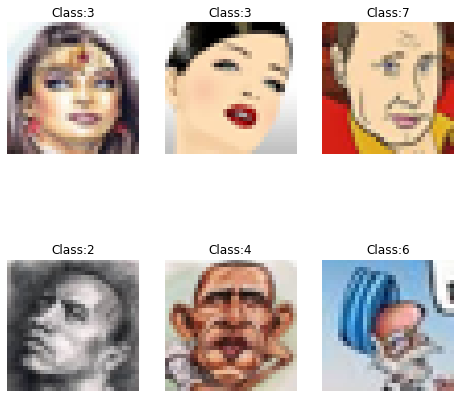

In [72]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]  # c=3
ind = np.random.randint(0,y.shape[0],6)   #from the all dataset 0 to 672(exclusive) draw 6 fig
display_images(X[ind],y[ind], row=2,col=3)  # 

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 

  **Answer**- Ghost faces are made from the eigen vector. So it is taking 5 eigen vectors from the most 12 dominant vectors for the entire dataset. And then try to standardized it by making it mean equal to 0 and plotting them as a image. These ghost faces give an averge face. Since these eigen vector tries to capture most of the variance among all the image. But since one eigen vector can't capture all the image, so the image is mixed up image of all dataset resulted in ghost like image.


- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image. 

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?
 
Answer: Images of same class are near each other majorly and forming a cluster. Since we the number of data points is large we are not able to visualize them properly, but roughly this is my observation


#### Write a function that gives eigen values and eigen vectors given data

In [73]:
# write function
def eigen(matrix):
  return np.linalg.eigh(matrix)   # works faster than eig, apply when matrix is symmetric
  

#### Compute eigen values and plot eigen value spectrum

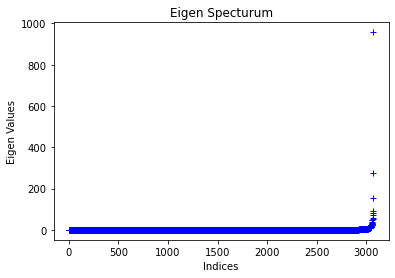

In [74]:
# eigen values and spectrum


def colStandardizing(x):
  """ Perform column standardizing, mean=0 and SD=1 for every attribute"""
  x=x.T
  data=x
  index=0


  colMean=[]
  colStd=[]
  for col in data:
    colMean.append(float(col.mean()))
    colStd.append(float(col.std()))
    x[index]=(x[index]-col.mean())/col.std()
    index+=1
    
  x=x.T
  return x


img=[]

for image in X:       # image is 32, 32, 3
  element=image.flatten()
  img.append(element)

img=np.array(img)
img=colStandardizing(img)
#covar = np.matmul(x.T , x)/len(x)    # why both are giving different results
covar = np.cov(img.T)
values, vector = eigen(covar)         #eigenvectors (in columns)and The eigenvalues in ascending order

plt.plot(values,"b+")
plt.ylabel("Eigen Values")
plt.xlabel("Indices")
plt.title("Eigen Specturum")
plt.show()

#### Plot the percentage of variances vs the number of principal components

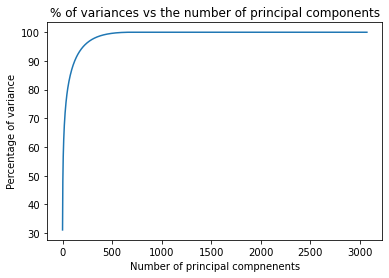

In [75]:
# plot variance vs components
sum=np.sum(values)
suffixsum=[]
random.seed(34)

def numofEigen(var,val):
  # number of eigen value required for variance "var"
  index=0
  curr=0
  numEigen=-1
  rowsum=np.sum(values)
  for eigenValues in val:
    curr+=eigenValues
    index+=1
    if (curr*100/rowsum)>var:
      return index


curr=0

for eigenValues in values[::-1]:
  curr+=eigenValues
  suffixsum.append(curr*100/sum)

allDataSetVar=numofEigen(90,values[::-1])

plt.plot(suffixsum)
plt.ylabel("Percentage of variance")
plt.xlabel("Number of principal compnenents")
plt.title("% of variances vs the number of principal components")
plt.show()

#### Visualize eigen faces(eigen vectors)

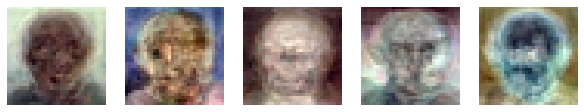

In [89]:

#Use the below sample code to visualize the eigen faces and reconstructed images (can write your own function as well)

def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image.T,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()


indices = [(len(X.T)-random.randrange(12)-1) for i in range(5)]
plot(vector,H,W,C, indices)

#### Reconstruction 

406


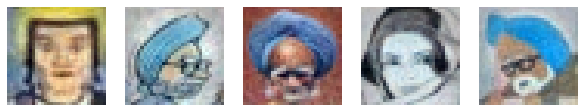

In [77]:
# reconstruction

def undoColStd(x):
  """ Undo column standardizing, for every attribute"""
  x=x.T
  data=x
  index=0

  for col in data:
    x[index]=(x[index]*colStd[index])+colMean[index]
    index+=1
    
  x=x.T
  return x

def reconstruct(k):

  #using top k eigen vector reconstruct the image, which maintain 99% variance
  eigenVector=vector.T[len(vector.T)-k:]        # k*d dimension
  # first row will have the first eigen vector
  # now project all the image to these eigenVector

  newCoordinate=np.matmul(eigenVector,img.T)              # compressed image
  reconstructed=np.matmul(eigenVector.T, newCoordinate)   # reconstructing the image again
  
  #print(newCoordinate.shape)  # k*672
  #print(eigenVector.shape)  # k*672
  #print(vector.shape) # 3072*3072 (d*d)

  #reconstructed=undoColStd(reconstructed) 

  indices = [random.randrange(len(X))  for i in range(5)] 
  plot(reconstructed,H,W,C, indices)

numEigen=numofEigen(99,values[::-1])
print(numEigen)
reconstruct(numEigen)



#### Frobenius norm of the difference between original and reconstructed image.

* Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.


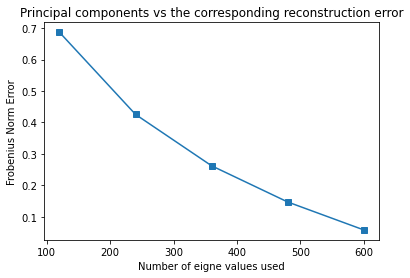

In [78]:
fScore=[]
def frobenius(Npca,vector, img):
  k=Npca
  eigenVector=vector.T[len(vector.T)-k:]        # k*d dimension

  newCoordinate=np.matmul(eigenVector,img.T)              # compressed image
  reconstructed=np.matmul(eigenVector.T, newCoordinate)   # reconstructing the image again
 
  #fScore.append(np.linalg.norm(np.subtract(reconstructed,img.T)))#/len(img))
  #print(len(img))
  fScore.append(((((reconstructed-img.T)**2).sum())**(1/2))/len(img))
    
    
keigen=[120,240,360,480,600]
for k in keigen:
  frobenius(k,vector,img)

plt.plot(keigen,fScore,marker="s")
plt.xlabel("Number of eigne values used")
plt.ylabel("Frobenius Norm Error")
plt.title("Principal components vs the corresponding reconstruction error")
plt.show()

#### Plot data in 2D

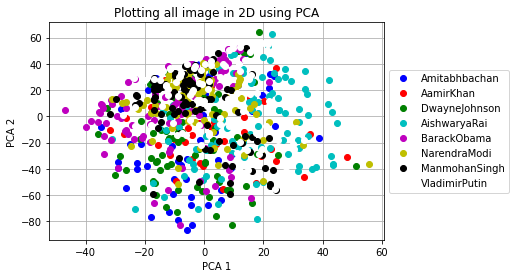

In [79]:
# plot data in 2D


cfw_dict_reverse = {
    0:'Amitabhbachan',
    1:'AamirKhan',
    2:'DwayneJohnson',
    3:'AishwaryaRai',
    4:'BarackObama',
    5:'NarendraModi',
    6:'ManmohanSingh' ,
    7:'VladimirPutin' 
}

newCoordinate=np.matmul(vector.T[len(vector.T)-2:] ,img.T)
newCoordinate=newCoordinate.T
newCoordinate.shape

colour=[]
dist=len(cfw_dict_reverse)
for i in range(dist):
  colour.append([])

for i in range(len(newCoordinate)):
  colour[y[i]].append(i)

col=['b','r','g','c','m','y','k','w']

for i in range(dist):
  current=[]
  for num in colour[i]:
    current.append(newCoordinate[num])
  
  current=np.array(current)
  current=current.T
  plt.plot(current[0],current[1],col[i]+'o',label=cfw_dict_reverse[i])

plt.grid()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("Plotting all image in 2D using PCA")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [80]:
# Load data again
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


#### Visualize dominant eigen faces of each of the classes

Dominant Eigen faces of class Amitabhbachan are as follows: 


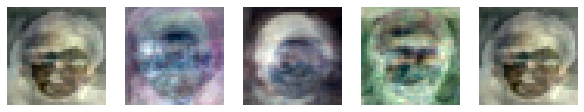

Dominant Eigen faces of class AamirKhan are as follows: 


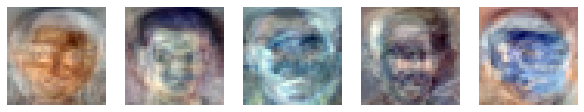

Dominant Eigen faces of class DwayneJohnson are as follows: 


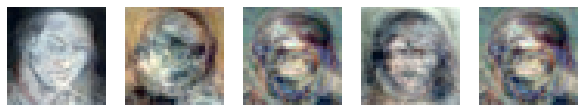

Dominant Eigen faces of class AishwaryaRai are as follows: 


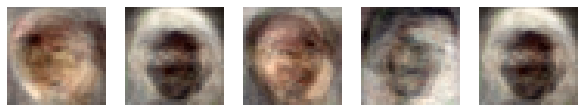

Dominant Eigen faces of class BarackObama are as follows: 


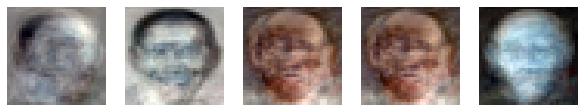

Dominant Eigen faces of class NarendraModi are as follows: 


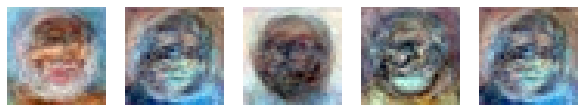

Dominant Eigen faces of class ManmohanSingh are as follows: 


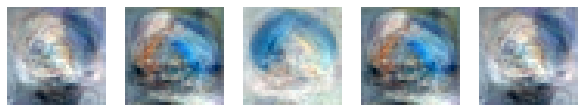

Dominant Eigen faces of class VladimirPutin are as follows: 


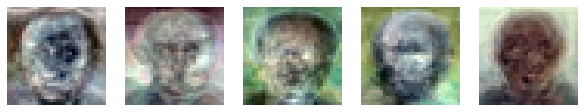

In [88]:
# visualize
dist=len(cfw_dict_reverse)
classes=[]    # containing index of ith member
for i in range(dist):
  classes.append([])

for i in range(len(y)):
  classes[y[i]].append(i)


img=[]
for image in X:       # image is 32, 32, 3
  element=image.flatten()
  img.append(element)

img=np.array(img)
img=colStandardizing(img)
numForVariance=[]

#*****************************************************************************
# for every member

for i in range(dist): 
  current=[]          # input data for ith member
  for num in colour[i]: # for each index of ith person
    current.append(img[num])
  
  current=np.array(current)
  current=current.T
  #print(current.shape)
  covar = np.cov(current)
  values, vector = eigen(covar)         #eigenvectors (in columns)and The eigenvalues in ascending order
  
  numEigenValues=numofEigen(90,values[::-1])    # preserve 90% of variance
  numForVariance.append(numEigenValues)
  
  ####eigenVector=vector.T[len(vector.T)-numEigenValues:]        # k*d dimension
  # first row will have the first eigen vector
  # now project all the image to these eigenVector

  ####newCoordinate=np.matmul(eigenVector,current)              # compressed image
  ####print(newCoordinate.shape)

  print("Dominant Eigen faces of class",cfw_dict_reverse[i],"are as follows: ")
  indices = [(len(X.T)-random.randrange(10)-1) for i in range(5)]
  plot(vector,H,W,C, indices)
  

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

In [82]:
# components required
print(numForVariance)
print("Class Name:\tNumber of eigen vectors needed to get 90% variance")
for i in range(len(numForVariance)):
  print(cfw_dict_reverse[i],'\t',numForVariance[i])

print("Total Dataset:\t",allDataSetVar)


[22, 25, 29, 38, 45, 59, 53, 47]
Class Name:	Number of eigen vectors needed to get 90% variance
Amitabhbachan 	 22
AamirKhan 	 25
DwayneJohnson 	 29
AishwaryaRai 	 38
BarackObama 	 45
NarendraModi 	 59
ManmohanSingh 	 53
VladimirPutin 	 47
Total Dataset:	 124


#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

## Observation/analysis
**Answer: No. As we can see no. of components required to capture 90% variance is different among different classes. It is justified the classes are different, when we say class are different that implies the the matrix made from the classses will be different. So, when the data are different and not follow the same structure then the PCA will be differents and require more/less number of PCA to capture 90% of variance. Also the number of images in each class is different. Which implies the variance on the same person image will be more. This also leads to different component for each classes.**

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [84]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([random.randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


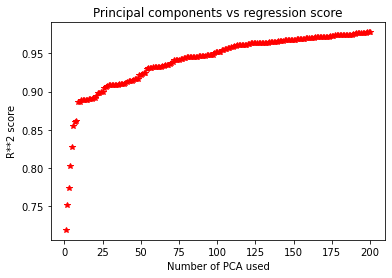

In [85]:
# code here
from sklearn.linear_model import LinearRegression

img=[]

for image in X:       # image is 32, 32, 3
  element=image.flatten()
  img.append(element)

img=np.array(img)
img=colStandardizing(img)
#covar = np.matmul(x.T , x)/len(x)    # why both are giving different results
covar = np.cov(img.T)
values, vector = eigen(covar)         #eigenvectors (in columns)and The eigenvalues in ascending order

scores=[]

for k in range(1,201):   # for k highest pca
  eigenVector=vector.T[len(vector.T)-k:]        # k*d dimension
  newCoordinate=np.matmul(eigenVector,img.T)    # compressed image
  reg = LinearRegression().fit(newCoordinate.T,label)
  scores.append(reg.score(newCoordinate.T,label))
    

plt.plot(list(range(1,201)),scores,'r*')
plt.xlabel("Number of PCA used")
plt.ylabel("R**2 score")
plt.title("Principal components vs regression score")
plt.show()
